In [1]:
# Your first requirement is to create a series of scatter plots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# After each plot add a sentence or too explaining\data\2.5\forecast what the code is and analysing.

Example on how to make an API call using your API key
API call

http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={API key}

In [2]:
# Dependencies
import collections
# collections_abc = getattr(collections, 'Iterable', collections)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from config import API
import json

# # Configure gmaps
# gmaps.configure(api_key=gkey)

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [4]:
from citipy import citipy

#randome numbers between -90 to 90 for latitude and -180 to 180 for longitude
city = citipy.nearest_city(-19, 169.21)       
city.city_name, city.country_code     # Tainan, my home town   


('isangel', 'vu')

In [58]:

# Range of latitudes and longitudes
# while c < 644:
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs = np.hstack((lats,lngs))
# print(list(lat_lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# c= len(cities)


In [ ]:
# Perform a weather check on each of the cities using a series of successive API calls.
#cities = ['yinchuan','airai','kushima']
# temp = []

# api_url = f"https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={API}"
# for city in cities:
  
#   wea_data = requests.get(api_url).json() 
# #Get Temperature
# #   temp = wea_data["main"]["temp"]
#   temp.append(wea_data['main']['temp'])

# print(f"The temperature information for {cities} received is: {temp}")

In [ ]:
# &units={units}


In [63]:
# cities = ["Paris", "Sydney", "Oslo", "New York", "Tokyo"]
units ="imperial"
# set up lists to hold reponse info
lat = []
max_temp =[]
windspeed =[]
humid =[]
cloud = []
date = []
country =[]

# Loop through the list of cities and perform a request for data on each


for city in cities:
    try:
        api_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API}&units={units}"
        #print(api_url)
        response = requests.get(api_url).json()
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

    except KeyError:
        lat.append(-999999)
        max_temp.append(-999999)

print(f"The latitude information information for {cities} received is: {lat}")
print(f"The temperature information is: {max_temp}")
print(f"The humidity is: {humid}")
print(f"The country  received is: {country}")



The latitude information information for ['ilulissat', 'belushya guba', 'illoqqortoormiut', 'rikitea', 'mys shmidta', 'tuktoyaktuk', 'carupano', 'veraval', 'warqla', 'tiksi', 'mataura', 'saskylakh', 'busselton', 'punta arenas', 'venezuela', 'nanortalik', 'adre', 'saint george', 'saint-augustin', 'albany', 'poum', 'ribeira grande', 'bluff', 'thompson', 'ushuaia', 'khatanga', 'torbay', 'kishi', 'dire dawa', 'watertown', 'nikolskoye', 'atuona', 'kodiak', 'praia', 'yellowknife', 'alappuzha', 'murgab', 'natchitoches', 'greven', 'vaitupu', 'ugoofaaru', 'faanui', 'arraial do cabo', 'muisne', 'san patricio', 'caravelas', 'hilo', 'hobbs', 'khani', 'houma', 'acarau', 'samusu', 'tashtyp', 'mahibadhoo', 'longyearbyen', 'prieta', 'barentsburg', 'puerto ayora', 'hermanus', 'avera', 'castro', 'ponca city', 'jamestown', 'srivardhan', 'margate', 'vung tau', 'berlevag', 'sitka', 'mutsamudu', 'kahului', 'goba', 'new norfolk', 'souillac', 'kadykchan', 'cape town', 'bredasdorp', 'zhuzhou', 'kearney', 'goba

In [64]:
# len(lat, temp, windspeed, humid, cloud, date, country) 
# temp
# windspeed
# humid
# cloud 
# date 
# country
len(lat), len(max_temp), len(windspeed), len(humid), len(cloud), len(country), len(date)


(606, 606, 553, 553, 553, 553, 553)

In [ ]:
cities

In [12]:
# # Note: target url works!
# target_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats}&lon={lngs}&appid={API}"
# # Run a request to endpoint and convert result to json
# wea_data = requests.get(target_url).json()

# # Print the json
# wea_data

{'cod': '400', 'message': 'wrong latitude'}

In [65]:
# create a data frame from cities, lat, and temp
weather_dict = {"city": cities,"lat": lat, "temp":max_temp}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,ilulissat,69.2167,32.02
1,belushya guba,-999999.0000,-999999.00
2,illoqqortoormiut,-999999.0000,-999999.00
3,rikitea,-23.1203,73.22
4,mys shmidta,-999999.0000,-999999.00
...,...,...,...
601,constitucion,-35.3333,51.46
602,vardo,70.3705,40.98
603,inhambane,-23.8650,68.00
604,la orilla,17.9833,78.08


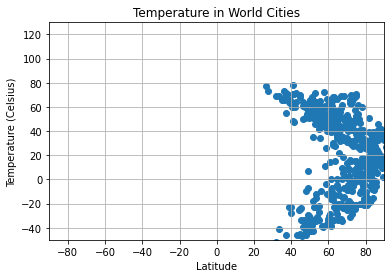

In [66]:
# Build a scatter plot for each data type
plt.xlim( [ -90, 90 ] ) 
plt.ylim( [-50 , 130 ] ) 
plt.scatter(weather_data["temp"], weather_data["lat"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [ ]:
# Lets try requestion by name

# target2_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{state},{country}&limit={limit}&appid={API}"

# wea2_data = requests.get(target2_url).json()

# # Print the json
# wea2_data


In [26]:
wea_data.keys()

dict_keys(['cod', 'message'])

In [27]:
len(wea_data["list"])

KeyError: 'list'

In [75]:
North = weather_data[weather_data["lat"] >= 0 ]
print(North)

            city      lat   temp
0      ilulissat  69.2167  32.02
5    tuktoyaktuk  69.4541  44.60
6       carupano  10.6678  75.33
7        veraval  20.9000  86.36
9          tiksi  71.6872  42.73
..           ...      ...    ...
599    peachland  49.7665  69.53
600         hami  42.8000  95.02
602        vardo  70.3705  40.98
604    la orilla  17.9833  78.08
605   marienburg  54.0359  57.11

[385 rows x 3 columns]


In [ ]:
# Extract latitude and temp
lat = wea_data["city"]['coord']['lat']
temp = wea_data["list"][0]["main"]['temp']
temp, lat

The r-squared is: 0.4323322231256785


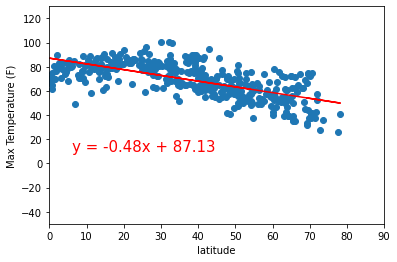

In [76]:
# Your second requirement is to run linear regression on each relationship, only this time separating them 
# into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude): 

# Northern Hemisphere (greater than or equal to 0 degrees latitude)
# # lets append a list of values and insert weather_data["lat"] > 0 or use a dataframe then graph it!


x_values = North['lat']
y_values = North['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlim( [ 0, 90 ] ) 
plt.ylim( [-50 , 130 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.9999999995635256


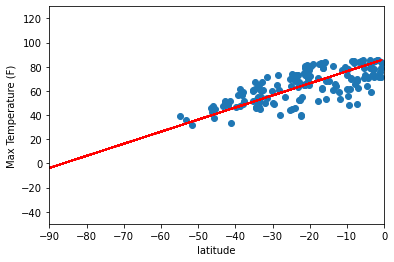

In [78]:
# Southern Hemisphere (less than 0 degrees latitude)
# # lets append a list of values and insert weather_data["lat"] < 0 or use a dataframe then graph it!
south =  weather_data[weather_data["lat"] < 0 ]

x_values = south['lat']
y_values = south['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlim( [ -90, 0 ] ) 
plt.ylim( [-50 , 130 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
#Latitude vs. Humidity -----North
x_values = North['lat']
y_values = North['humid']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlim( [ 0, 90 ] ) 
plt.ylim( [-50 , 130 ] )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


